# Test Ray-Sphere Intersection & Cartesian-Spherical Conversion

tensor([[ 0.0000, -0.3536,  0.3536]])
tensor(0.5000)
tensor([[  0.0000, -45.0000]])
torch.Size([1, 3])


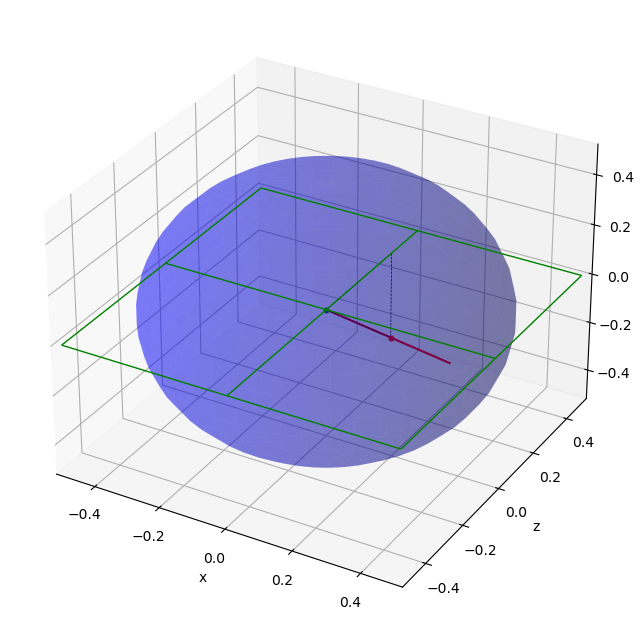

In [1]:
from common import *
from utils import sphere
from utils import math


def PlotSphere(ax, r):
    u, v = np.mgrid[0:2 * math.pi:50j, 0:math.pi:20j]
    x = np.cos(u) * np.sin(v) * r
    y = np.sin(u) * np.sin(v) * r
    z = np.cos(v) * r
    ax.plot_surface(x, y, z, rstride=1, cstride=1,
                    color='b', linewidth=0.5, alpha=0.3)


def PlotPlane(ax, r):
    # 二元函数定义域平面
    x = np.linspace(-r, r, 3)
    y = np.linspace(-r, r, 3)
    X, Y = np.meshgrid(x, y)
    ax.plot_wireframe(X, Y, X * 0, color='g', linewidth=1)


p = torch.tensor([[0.0, 0.0, 0.0]])
v = torch.tensor([[0.0, -1.0, 1.0]])
r = torch.tensor([[0.5]])
v = v / torch.norm(v) * r * 2
p_on_sphere_ = sphere.ray_sphere_intersect(p, v, r)[0][0]
print(p_on_sphere_)
print(p_on_sphere_.norm())
spher_coord = sphere.cartesian2spherical(p_on_sphere_)
print(spher_coord[..., 1:3].rad2deg())
p_on_sphere = sphere.spherical2cartesian(spher_coord)
print(p_on_sphere_.size())

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
plt.xlabel('x')
plt.ylabel('z')

PlotPlane(ax, r.item())
PlotSphere(ax, r[0, 0].item())

ax.scatter([0], [0], [0], color="g", s=10)  # Center
ax.scatter([p_on_sphere[0, 0].item()],
           [p_on_sphere[0, 2].item()],
           [p_on_sphere[0, 1].item()],
           color="r", s=10)  # Ray position
ax.scatter([p_on_sphere_[0, 0].item()],
           [p_on_sphere_[0, 2].item()],
           [p_on_sphere_[0, 1].item()],
           color="y", s=10)  # Ray position

p_ = p + v
ax.plot([p[0, 0].item(), p_[0, 0].item()],
        [p[0, 2].item(), p_[0, 2].item()],
        [p[0, 1].item(), p_[0, 1].item()],
        color="r")

ax.plot([p_on_sphere_[0, 0].item(), p_on_sphere_[0, 0].item()],
        [p_on_sphere_[0, 2].item(), p_on_sphere_[0, 2].item()],
        [0, p_on_sphere_[0, 1].item()], color="k", linestyle='--', linewidth=0.5)

ax.plot([p_on_sphere_[0, 0].item(), 0],
        [p_on_sphere_[0, 2].item(), 0],
        [0, 0],
        linewidth=0.5, linestyle="--", color="k")

ax.plot([p_on_sphere_[0, 0].item(), 0],
        [p_on_sphere_[0, 2].item(), 0],
        [p_on_sphere_[0, 1], 0],
        linewidth=0.5, linestyle="--", color="k")

ax.set_xlim(-r.item(), r.item())
ax.set_ylim(-r.item(), r.item())
ax.set_zlim(-r.item(), r.item())

plt.show()
